In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

In [ ]:
Tweet= pandas.read_csv("../input/twitter-airline-sentiment/Tweets.csv")
Tweet.head()

In [ ]:
# (len(Tweet)-Tweet.count())/len(Tweet)

# Mood_count=Tweet['airline_sentiment'].value_counts()

# Index = [1,2,3]
# plt.bar(Index,Mood_count)
# plt.xticks(Index,['negative','neutral','positive'],rotation=45)
# plt.ylabel('Mood Count')
# plt.xlabel('Mood')
# plt.title('Count of Moods')

# Tweet['airline'].value_counts()

# def plot_sub_sentiment(Airline):
#     df=Tweet[Tweet['airline']==Airline]
#     count=df['airline_sentiment'].value_counts()
#     Index = [1,2,3]
#     plt.bar(Index,count)
#     plt.xticks(Index,['negative','neutral','positive'])
#     plt.ylabel('Mood Count')
#     plt.xlabel('Mood')
#     plt.title('Count of Moods of '+Airline)
# plt.figure(1,figsize=(12, 12))
# plt.subplot(231)
# plot_sub_sentiment('US Airways')
# plt.subplot(232)
# plot_sub_sentiment('United')
# plt.subplot(233)
# plot_sub_sentiment('American')
# plt.subplot(234)
# plot_sub_sentiment('Southwest')
# plt.subplot(235)
# plot_sub_sentiment('Delta')
# plt.subplot(236)
# plot_sub_sentiment('Virgin America')

# From the above plots one can find that the distribution of moods for the first three airlines are always skewed toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies. 

# NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

# def NR_Count(Airline):
#     if Airline=='All':
#         df=Tweet
#     else:
#         df=Tweet[Tweet['airline']==Airline]
#     count=dict(df['negativereason'].value_counts())
#     Unique_reason=list(Tweet['negativereason'].unique())
#     Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
#     Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
#     Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
#     return Reason_frame

# def plot_reason(Airline):
#     df=NR_Count(Airline)
#     count=df['count']
#     Index = range(1,(len(df)+1))
#     plt.bar(Index,count)
#     plt.xticks(Index,df['Reasons'],rotation=90)
#     plt.ylabel('Count')
#     plt.xlabel('Reason')
#     plt.title('Count of Reasons for '+Airline)

# plot_reason('All')

# plot_reason('US Airways')

# plot_reason('United')

# plot_reason('American')

# plot_reason('Southwest')

# plot_reason('Delta')

# plot_reason('Virgin America')



# ### D: Word Cloud for the negative Tweets

# from wordcloud import WordCloud,STOPWORDS

# df=Tweet[Tweet['airline_sentiment']=='negative']
# words = ' '.join(df['text'])
# cleaned_word = " ".join([word for word in words.split()
#                             if 'http' not in word
#                                 and not word.startswith('@')
#                                 and word != 'RT'
#                             ])

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='black',
#                       width=3000,
#                       height=2500
#                      ).generate(cleaned_word)

# plt.figure(1,figsize=(12, 12))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

# **We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.**

# ### E: Preprocess data for classification

# **Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.**



#



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
# 数据清洗

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 
# 将标签转换成数字
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))


In [3]:
import pandas as pd
p_df2 = pd.read_csv('p_df2.csv')



In [4]:
#train,test = train_test_split(Tweet,test_size=0.2,random_state=42)
train,test = train_test_split(p_df2,test_size=0.2,random_state=42)

In [5]:
train_clean_tweet = train.text_cleaned.tolist()
test_clean_tweet = test.text_cleaned.tolist()

In [7]:
test.head()
#(0 = negative, 2 = neutral, 4 = positive)

,Unnamed: 0,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
539763,755727,0,2288425922,Mon Jun 22 19:08:48 PDT 2009,NO_QUERY,mariantoinett,@jnicole80 going away party I just thought ...,jnicole going away party thought moving one ho...,"[302915, 9, 128, 185, 143, 600, 13, 123, 101, ...",14,0
159816,224031,0,1977327140,Sat May 30 20:42:31 PDT 2009,NO_QUERY,OneOfTheRobs,"@KristinaDeFonte I'm so sorry, I just got home...",kristinadefonte sorry got home like minutes ag...,"[214481, 57, 6, 25, 4, 418, 314, 17, 235, 51, ...",14,0
11317,15750,0,1554487781,Sat Apr 18 17:07:53 PDT 2009,NO_QUERY,aferomckinney,@allegromoderato Sounds like a great idea! I n...,allegromoderato sounds like great idea need ge...,"[181304, 212, 4, 31, 329, 28, 3, 9012, 1076, 7...",14,0
129371,181133,0,1966765733,Fri May 29 18:21:35 PDT 2009,NO_QUERY,tokyofresh,@vickitHU becuz jose is nasty and @chicitydane...,vickithu becuz jose nasty chicitydane payin mi...,"[123378, 6313, 4541, 1614, 123379, 16370, 171,...",13,0
1041416,1461162,4,2063908495,Sun Jun 07 04:32:34 PDT 2009,NO_QUERY,MeganAlqueza,"YAY Back home from the mall. man, I'm tired",yay back home mall man tired,"[129, 14, 25, 1082, 109, 105]",6,1


In [ ]:
# 转换成list，方便特征提取
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

[](http://)特征提取：参考文档：https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [110]:
train_features

<911870x414191 sparse matrix of type '<class 'numpy.int64'>'
	with 8065030 stored elements in Compressed Sparse Row format>

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [10]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    MLPClassifier(solver='sgd', alpha=1e-5,
       hidden_layer_sizes=(5, 2), random_state=1, max_iter=500),
    GradientBoostingClassifier(random_state=0)
    
]#gpu不能一次性加载这么多模型兵训练

In [16]:
#dense_features=train_features.toarray()
#dense_test= test_features.toarray()
Accuracy=[]
Model=[]

In [128]:
import gc
gc.collect()

178

In [129]:
train_features.toarray()

MemoryError: 

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(test['sentiment'],predictions)
    print(classification_report(test.sentiment,  predictions, labels=[0,2,4]))
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+ ' is: '+str(accuracy))    

In [155]:
#X = p_df2.words.values.tolist()
X= v.fit_transform(p_df2.text_cleaned.tolist())
y = p_df2.target.values.tolist()


In [190]:
y = label_binarize(y, classes=[0, 2, 4])
n_classes = y.shape[1]

In [165]:
n_classes

3

In [162]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [163]:
X_train.shape

(763691, 477134)

In [171]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [168]:
X_test

<376147x477134 sparse matrix of type '<class 'numpy.int64'>'
	with 3327546 stored elements in Compressed Sparse Row format>

In [223]:
aucc

0.7425660976096439

In [222]:
lr = LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200)
lrmodel = lr.fit(train_features,train['target'])
lrpred = lrmodel.predict(test_features)
lr_score = lr.decision_function(test_features)
predictions = [round(value) for value in lrpred]
lr_accuracy = accuracy_score(test['target'],predictions)
test_target = label_binarize(test.target, classes=[0,4])
lr_fpr, lr_tpr, theshold = roc_curve(test_target, lr_score)

print('ROC-AUC of LR is: ' +  str(auc(lr_fpr, lr_tpr)))
print('Accuracy of LR is: '+ str(lr_accuracy)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

ROC-AUC of LR is: 0.7425660976096439
Accuracy of LR is: 0.6617156793935991


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.62      0.82      0.71    114395
           2       0.00      0.00      0.00         0
           4       0.73      0.51      0.60    113573

   micro avg       0.66      0.66      0.66    227968
   macro avg       0.45      0.44      0.44    227968
weighted avg       0.68      0.66      0.65    227968



In [224]:
knn = KNeighborsClassifier(3)
knn_model = knn.fit(train_features, train.target)
knn_pred = knn_model.predict(test_features)
knn_score = lr.decision_function(test_features)
predictions = [round(v) for v in knn_pred]
knn_acc = accuracy_score(test.target, predictions)
#test_target = label_binarize(test.target, classes=[0,4])
knn_fpr, knn_tpr, theshold = roc_curve(test_target, knn_score)


print('ROC-AUC of LR is: ' +  str(auc(lr_fpr, lr_tpr)))
print('Accuracy of LR is: '+ str(lr_accuracy)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

ROC-AUC of LR is: 0.7425660976096439
Accuracy of LR is: 0.6617156793935991


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.68      0.68      0.68    114395
           2       0.00      0.00      0.00         0
           4       0.67      0.67      0.67    113573

   micro avg       0.67      0.67      0.67    227968
   macro avg       0.45      0.45      0.45    227968
weighted avg       0.67      0.67      0.67    227968



In [ ]:
svc = SVC(kernel="rbf", C=0.025, probability=True)
#svc = SVC(kernel='rbf',C=1,gamma=0.1)
svc_model = svc.fit(train_features, train.target)
svc_pred = svc.model.predict(test_features)
predictions = [rount(v) for v in svc_pred]
svc_acc = accuracy_score(test.target, predictions)

svc_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
svc_fpr, svc_tpr, theshold = roc_curve(test_target, svc_score)


print('ROC-AUC of LR is: ' +  str(auc(svc_fpr, svc_tpr)))
print('Accuracy of LR is: '+ str(svc_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#svc = SVC(kernel="rbf", C=0.025, probability=True)
svc = SVC(kernel='rbf',C=1,gamma=0.1)
svc_model = svc.fit(train_features, train.target)
svc_pred = svc.model.predict(test_features)
predictions = [rount(v) for v in svc_pred]
svc_acc = accuracy_score(test.target, predictions)

svc_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
svc_fpr, svc_tpr, theshold = roc_curve(test_target, svc_score)


print('ROC-AUC of LR is: ' +  str(auc(svc_fpr, svc_tpr)))
print('Accuracy of LR is: '+ str(svc_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(train_features, train.target)
dt_pred = dt_model.predict(test_features)
predictions = [rount(v) for v in dt_pred]
dt_acc = accuracy_score(test.target, predictions)

dt_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
dt_fpr, dt_tpr, theshold = roc_curve(test_target, dt_score)


print('ROC-AUC of LR is: ' +  str(auc(dt_fpr, dt_tpr)))
print('Accuracy of LR is: '+ str(dt_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf_model = rf.fit(train_features, train.target)
rf_pred = rf_model.predict(test_features)
predictions = [rount(v) for v in rf_pred]
rf_acc = accuracy_score(test.target, predictions)

rf_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
rf_fpr, rf_tpr, theshold = roc_curve(test_target, rf_score)


print('ROC-AUC of LR is: ' +  str(auc(rf_fpr, rf_tpr)))
print('Accuracy of LR is: '+ str(rf_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
ada = AdaBoostClassifier()
ada_model = ada.fit(train_features, train.target)
ada_pred = ada_model.predict(test_features)
predictions = [rount(v) for v in ada_pred]
ada_acc = accuracy_score(test.target, predictions)

ada_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
ada_fpr, ada_tpr, theshold = roc_curve(test_target, ada_score)


print('ROC-AUC of LR is: ' +  str(auc(ada_fpr, ada_tpr)))
print('Accuracy of LR is: '+ str(ada_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
gnb = GaussianNB()
gnb_model = ada.fit(train_features, train.target)
gnb_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in gnb_pred]
gnb_acc = accuracy_score(test.target, predictions)

gnb_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
gnb_fpr, gnb_tpr, theshold = roc_curve(test_target, gnb_score)


print('ROC-AUC of GaussianNB is: ' +  str(auc(gnb_fpr, gnb_tpr)))
print('Accuracy of GaussianNB is: '+ str(gnb_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
xfbc = XGBClassifier()
xfbc_model = ada.fit(train_features, train.target)
xfbc_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in xfbc_pred]
xfbc_acc = accuracy_score(test.target, predictions)

xfbc_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
xfbc_fpr, xfbc_tpr, theshold = roc_curve(test_target, xfbc_score)


print('ROC-AUC of XGBClassifier is: ' +  str(auc(gnb_fpr, gnb_tpr)))
print('Accuracy of XGBClassifier is: '+ str(gnb_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)
mlp_model = ada.fit(train_features, train.target)
mlp_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in mlp_pred]
mlp_acc = accuracy_score(test.target, predictions)

mlp_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
mlp_fpr, mlp_tpr, theshold = roc_curve(test_target, xfbc_score)


print('ROC-AUC of MLPClassifier is: ' +  str(auc(mlp_fpr, mlp_tpr)))
print('Accuracy of MLPClassifier is: '+ str(mlp_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
gbc_model = ada.fit(train_features, train.target)
gbc_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in gbc_pred]
gbc_acc = accuracy_score(test.target, predictions)

gbc_score = lr.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
gbc_fpr, gbc_tpr, theshold = roc_curve(test_target, gbc_score)


print('ROC-AUC of GradientBoostingClassifier is: ' +  str(auc(gbc_fpr, gbc_tpr)))
print('Accuracy of GradientBoostingClassifier is: '+ str(gbc_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

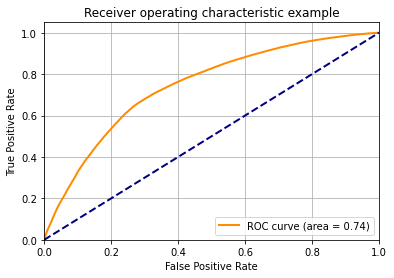

In [209]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(lr_fpr, lr_tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
Accuracy.append(accuracy)

## Compare the model performances

In [ ]:
Index = [1,2,3,4,5,6,7,8,9]
plt.bar(Index,Accuracy,alpha=0.9, width = 0.6, 
        facecolor = 'green', edgecolor = 'white' )
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')